In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
data = pd.read_csv('nyc_building_sales.csv', index_col=0)

/Users/Honors/anaconda/envs/nyc-buildings/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,18,20,22,23,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data['Borough'].value_counts()

Queens           15025
Brooklyn         10919
Manhattan         8474
Bronx             4145
Staten Island     4072
Name: Borough, dtype: int64

In [5]:
data.head(5)

,Borough,Block,Lot,SalePrice,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,ValueSqFt
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Queens,949.0,44.0,620000.0,401.0,317.00,1008.0,30.0,22.0,11370.0,E263,114.0,620.0,19-68 81 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,N,A5,1.0,0.0,NaN,"SCAVETTA, SHEILA",1800.0,1224.0,0.0,1224.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,2.0,1.0,1.0,18.0,100.0,18.0,34.0,NaN,3.0,N,5.0,2.0,9438.0,28315.0,0.0,0.0,1945.0,E,0.0,0.0,NaN,NaN,0.68,0.9,0.0,2.0,4.0,4.009490e+09,0.0,317.0,1014867.0,220289.0,9c,NaN,410 091,40701.0,NaN,0.000000e+00,NaN,1.0,15v1,506.535948
1,Queens,976.0,13.0,620000.0,401.0,317.00,2000.0,30.0,22.0,11370.0,E263,114.0,620.0,21-16 81 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,N,A5,1.0,0.0,NaN,"PASQUA, BARBARA",1800.0,1836.0,0.0,1836.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,2.0,1.0,1.0,18.0,100.0,18.0,34.0,NaN,3.0,N,5.0,2.0,8141.0,27840.0,8141.0,20810.0,1950.0,E,0.0,0.0,NaN,NaN,1.02,0.9,0.0,2.0,4.0,4.009760e+09,0.0,317.0,1014911.0,219972.0,9c,NaN,410 080,40701.0,NaN,0.000000e+00,NaN,1.0,15v1,337.690632
2,Queens,15828.0,53.0,273710.0,414.0,992.00,2018.0,27.0,31.0,11691.0,E265,101.0,3800.0,303 BEACH 38 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,N,A1,1.0,0.0,NaN,FEDERAL NATIONAL MORT,3810.0,1200.0,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,2.0,1.0,1.0,38.1,100.0,15.0,40.0,NaN,2.0,N,5.0,0.0,6660.0,12780.0,0.0,4896.0,2002.0,NaN,0.0,0.0,NaN,NaN,0.31,0.9,0.0,2.0,4.0,4.158280e+09,0.0,992.0,1047920.0,156002.0,31a,NaN,408 052,46101.0,NaN,4.158280e+09,12/2/2002,1.0,15v1,228.091667
3,Queens,15837.0,17.0,289000.0,414.0,972.04,2003.0,27.0,31.0,11691.0,E265,101.0,3800.0,334 BEACH 46 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,N,A6,1.0,0.0,P,ROBERT RIVERS,3804.0,745.0,0.0,745.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,1.0,1.0,1.0,40.0,95.1,20.0,30.0,G,1.0,N,5.0,0.0,3957.0,6966.0,3957.0,6966.0,1925.0,E,0.0,0.0,NaN,NaN,0.20,0.9,0.0,2.0,4.0,4.158370e+09,0.0,97204.0,1046175.0,155958.0,31a,NaN,408 050,46101.0,NaN,0.000000e+00,NaN,1.0,15v1,387.919463
4,Queens,15837.0,17.0,69000.0,414.0,972.04,2003.0,27.0,31.0,11691.0,E265,101.0,3800.0,334 BEACH 46 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,N,A6,1.0,0.0,P,ROBERT RIVERS,3804.0,745.0,0.0,745.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,1.0,1.0,1.0,40.0,95.1,20.0,30.0,G,1.0,N,5.0,0.0,3957.0,6966.0,3957.0,6966.0,1925.0,E,0.0,0.0,NaN,NaN,0.20,0.9,0.0,2.0,4.0,4.158370e+09,0.0,97204.0,1046175.0,155958.0,31a,NaN,408 050,46101.0,NaN,0.000000e+00,NaN,1.0,15v1,92.617450


In [6]:
%matplotlib inline

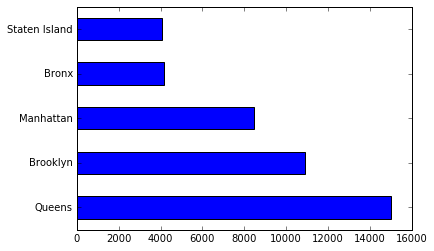

In [7]:
data['Borough'].value_counts().plot(kind='barh')

In [9]:
data.groupby('Borough')

In [10]:
help(pd.groupby)

Help on function groupby in module pandas.core.groupby:

groupby(obj, by, **kwds)
    Class for grouping and aggregating relational data. See aggregate,
    transform, and apply functions on this object.
    
    It's easiest to use obj.groupby(...) to use GroupBy, but you can also do:
    
    ::
    
        grouped = groupby(obj, ...)
    
    Parameters
    ----------
    obj : pandas object
    axis : int, default 0
    level : int, default None
        Level of MultiIndex
    groupings : list of Grouping objects
        Most users should ignore this
    exclusions : array-like, optional
        List of columns to exclude
    name : string
        Most users should ignore this
    
    Notes
    -----
    After grouping, see aggregate, apply, and transform functions. Here are
    some other brief notes about usage. When grouping by multiple groups, the
    result index will be a MultiIndex (hierarchical) by default.
    
    Iteration produces (key, group) tuples, i.e. chunking th

In [11]:
import missingno as msno

In [26]:
import matplotlib.pyplot as plt

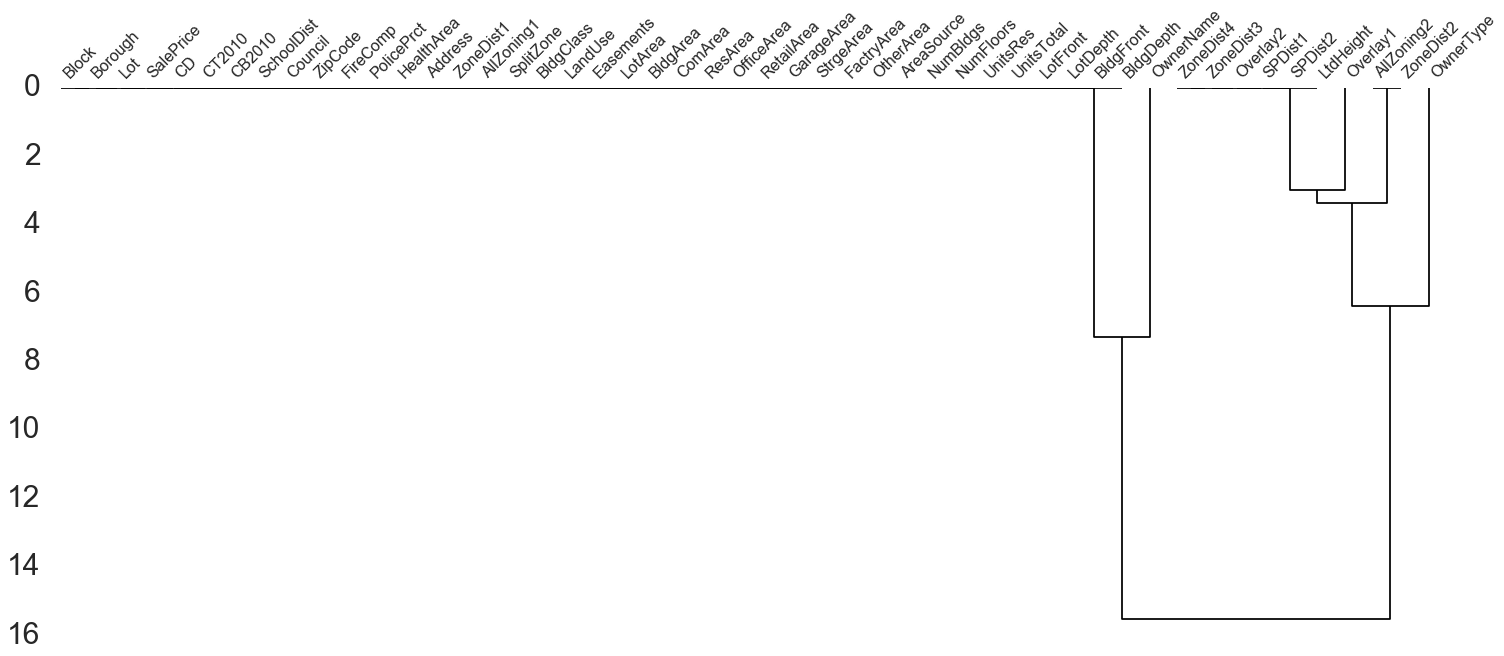

In [46]:
mat = msno.dendrogram(data.ix[1:250, 0:50], inline=False)
mat.axes[0].tick_params(axis='y', labelsize=30)

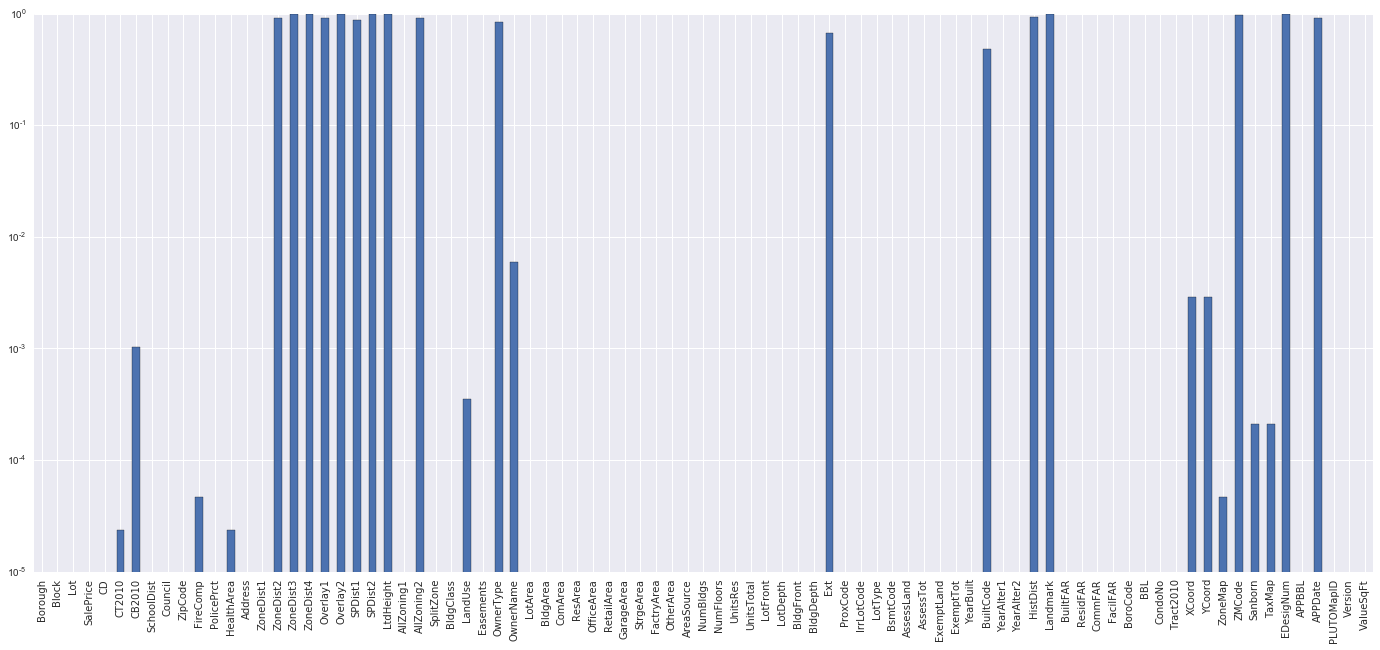

In [59]:
(data.isnull().sum() / len(data)).plot(kind='bar', figsize=(24, 10), logy=True)

`apply` can return not only singulars but also `Series`!

In [62]:
data.ix[:, ['Block', 'Lot']].apply(lambda x: pd.Series([x.min(), x.max()]))

,Block,Lot
0,1.0,1.0
1,16322.0,7515.0
